# Delhivery Case Study

By Gautam Naik (gautamnaik1994@gmail.com)  
Github Link: https://github.com/gautamnaik1994/Delhivery-Data-Engineering-Case-Study

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


**Business Goal**

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it


**Dataset**

**Column Profiling:**

| Field                           | Description                                                                                                                                                                                                                  |
|---------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| data                            | Tells whether the data is testing or training data                                                                                                                                                                           |
| trip_creation_time              | Timestamp of trip creation                                                                                                                                                                                                   |
| route_schedule_uuid             | Unique Id for a particular route schedule                                                                                                                                                                                    |
| route_type                      | Transportation type                                                                                                                                                                                                         |
| route_type - FTL                | Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way                                                                                             |
| route_type - Carting            | Handling system consisting of small vehicles (carts)                                                                                                                                                                         |
| trip_uuid                       | Unique ID given to a particular trip (A trip may include different source and destination centers)                                                                                                                           |
| source_center                   | Source ID of trip origin                                                                                                                                                                                                     |
| source_name                     | Source Name of trip origin                                                                                                                                                                                                   |
| destination_cente               | Destination ID                                                                                                                                                                                                               |
| destination_name                | Destination Name                                                                                                                                                                                                            |
| od_start_time                   | Trip start time                                                                                                                                                                                                              |
| od_end_time                     | Trip end time                                                                                                                                                                                                                |
| start_scan_to_end_scan          | Time taken to deliver from source to destination                                                                                                                                                                             |
| is_cutoff                       | Unknown field                                                                                                                                                                                                                |
| cutoff_factor                   | Unknown field                                                                                                                                                                                                                |
| cutoff_timestamp                | Unknown field                                                                                                                                                                                                                |
| actual_distance_to_destination  | Distance in Kms between source and destination warehouse                                                                                                                                                                     |
| actual_time                     | Actual time taken to complete the delivery (Cumulative)                                                                                                                                                                      |
| osrm_time                       | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)                 |
| osrm_distance                   | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)                                                  |
| factor                          | Unknown field                                                                                                                                                                                                                |
| segment_actual_time             | This is a segment time. Time taken by the subset of the package delivery                                                                                                                                                     |
| segment_osrm_time               | This is the OSRM segment time. Time taken by the subset of the package delivery                                                                                                                                              |
| segment_osrm_distance           | This is the OSRM distance. Distance covered by subset of the package delivery                                                                                                                                                |
| segment_factor                  | Unknown field                                                                                                                                                                                                                

In [1]:
import pandas as pd
import numpy as np 
import duckdb as db
pd.options.display.max_columns = None
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [2]:
data=pd.read_csv("./delhivery_data.csv")
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Feature Engineering

In [4]:
data = data.drop("data", axis=1)

In [5]:
data["trip_uuid"] = data["trip_uuid"].str.split("-").str[1]
data["route_schedule_uuid"]=data["route_schedule_uuid"].str.split(":").str[3]
data["trip_creation_time"]=pd.to_datetime(data["trip_creation_time"])
data["od_start_time"]=pd.to_datetime(data["od_start_time"])
data["od_end_time"]=pd.to_datetime(data["od_end_time"])
# df["cutoff_timestamp"]=pd.to_datetime(df["cutoff_timestamp"])

In [6]:
centers_df=db.sql("""
select distinct source_center as center, source_name as name from data where source_name is not null
union
select distinct destination_center as center, destination_name as name from data where destination_name is not null
""").to_df()

In [7]:
centers_df["state"]=centers_df["name"].str.split("(").str[1].replace("\(?\)?","", regex=True)
centers_df["temp"]=centers_df["name"].str.split(" ").str[0]
centers_df["city"]=centers_df["temp"].str.split("_").str[0]
centers_df["place"]=centers_df["temp"].str.split("_").str[1]
centers_df["code"]=centers_df["temp"].str.split("_").str[-1]
centers_df=centers_df.drop(["temp","name"], axis=1)

In [8]:
centers_df.sample(5)

,center,state,city,place,code
1044,IND562117AAA,Karnataka,Kanakapura,VaniThtr,D
290,IND680712AAA,Kerala,Irinjlkuda,Greens,D
316,IND852201AAA,Bihar,Saharsa,Gangjala,D
1413,IND762001AAA,Orissa,Phulbani,Krusphrma,D
272,IND403702AAA,Goa,Canacona,CharRsta,D


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_schedule_uuid             144867 non-null  object        
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   od_start_time                   144867 non-null  datetime64[ns]
 9   od_end_time                     144867 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144867 non-null  float64

In [10]:
data["segment_key"] = data["trip_uuid"] +"_"+ data["source_center"] +"_"+ data["destination_center"]

In [11]:
collapsed_inter_df=db.sql(""" 
select 
        segment_key
        , first(trip_uuid) as trip_uuid
        , first(source_center) as source_center
        , first(destination_center) as destination_center
        , first(trip_creation_time) as trip_creation_time
        , first(route_type) as route_type
        , first(od_start_time) as od_start_time
        , last(od_end_time) as od_end_time
        , first(start_scan_to_end_scan) as start_scan_to_end_scan
        , last(actual_distance_to_destination) as actual_distance_to_destination
        , last(actual_time) as actual_time_to_destination
        , sum(segment_actual_time) as actual_time
        , sum(segment_osrm_time) as segment_osrm_time
        , last(osrm_distance) as osrm_distance
        , sum(segment_osrm_distance) as segment_osrm_distance
from data group by segment_key
""").to_df()
collapsed_inter_df.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,segment_key,trip_uuid,source_center,destination_center,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance
0,153698045859626572_IND524101AAB_IND517501AAB,153698045859626572,IND524101AAB,IND517501AAB,2018-09-15 03:00:58.596515,FTL,2018-09-15 07:24:25.834574,2018-09-15 10:14:42.060695,170.0,76.029409,143.0,142.0,76.0,98.6939,93.2265
1,153833836174130977_IND673632AAA_IND673305AAA,153833836174130977,IND673632AAA,IND673305AAA,2018-09-30 20:12:41.741570,Carting,2018-09-30 20:12:41.741570,2018-10-01 01:04:41.744890,292.0,33.406799,44.0,43.0,37.0,36.9724,36.9725
2,153749921290385945_IND600056AAB_IND600044AAE,153749921290385945,IND600056AAB,IND600044AAE,2018-09-21 03:06:52.904238,Carting,2018-09-21 03:06:52.904238,2018-09-21 06:15:53.943104,189.0,25.000910,88.0,86.0,39.0,35.8459,37.6015
3,153838561974018796_IND473226AAA_IND473001AAA,153838561974018796,IND473226AAA,IND473001AAA,2018-10-01 09:20:19.740451,FTL,2018-10-01 09:20:19.740451,2018-10-01 11:15:57.418982,115.0,22.427948,44.0,44.0,36.0,30.0633,30.0632
4,153800528315390990_IND627811AAA_IND627401AAA,153800528315390990,IND627811AAA,IND627401AAA,2018-09-26 23:41:23.154160,FTL,2018-09-27 01:31:47.255547,2018-09-27 02:45:08.708179,73.0,31.798964,46.0,45.0,31.0,34.5860,34.5861


In [12]:
segment_df=db.sql(""" 
select collapsed_inter_df.*
       , scd.state as source_state
       , scd.city as source_city
       , dcd.state as destination_state
       , dcd.city as destination_city
    from collapsed_inter_df 
       join centers_df scd on collapsed_inter_df.source_center=scd.center
       join centers_df dcd on collapsed_inter_df.destination_center=dcd.center
 """).to_df()

In [13]:
segment_df=db.sql(""" 
select *, rank() over(partition by trip_uuid order by od_end_time ) rnk from segment_df 
""").to_df()

In [14]:
segment_df.head()

,segment_key,trip_uuid,source_center,destination_center,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,source_state,source_city,destination_state,destination_city,rnk
0,153671173668736946_IND110043AAA_IND110078AAA,153671173668736946,IND110043AAA,IND110078AAA,2018-09-12 00:22:16.687619,Carting,2018-09-12 00:22:16.687619,2018-09-12 01:29:19.277412,67.0,12.756768,44.0,43.0,25.0,18.7668,22.6548,Delhi,Delhi,Delhi,Janakpuri,1
1,153671277074687197_IND624001AAA_IND624619AAA,153671277074687197,IND624001AAA,IND624619AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 00:39:30.747127,2018-09-12 01:32:05.649177,52.0,26.534938,40.0,40.0,26.0,27.8573,27.8572,Tamil Nadu,Dindigul,Tamil Nadu,Oddnchtram,1
2,153671277074687197_IND624619AAA_IND624601AAA,153671277074687197,IND624619AAA,IND624601AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 01:32:05.649177,2018-09-12 02:52:44.647485,80.0,26.516747,39.0,39.0,26.0,28.2786,28.2786,Tamil Nadu,Oddnchtram,Tamil Nadu,Palani,2
3,153671277074687197_IND624601AAA_IND624101AAA,153671277074687197,IND624601AAA,IND624101AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 02:52:44.647485,2018-09-12 04:51:38.550800,118.0,23.527844,100.0,99.0,136.0,60.2645,61.6174,Tamil Nadu,Palani,Tamil Nadu,Kodaikanal,3
4,153671277074687197_IND624101AAA_IND624202AAA,153671277074687197,IND624101AAA,IND624202AAA,2018-09-12 00:39:30.747127,FTL,2018-09-12 04:51:38.550800,2018-09-12 06:45:07.329780,113.0,29.665603,87.0,86.0,118.0,55.1577,55.1577,Tamil Nadu,Kodaikanal,Tamil Nadu,Batlagundu,4


In [15]:
with open("segment_df.pkl", "wb") as f:
    pickle.dump(segment_df, f)

In [16]:
trip_df=db.sql("""
select 
    trip_uuid
    , first(source_center) as source_center
    , last(destination_center) as destination_center
    , count(*) as stops
    , first(trip_creation_time) as trip_creation_time
    , first(route_type) as route_type
    , first(od_start_time) as od_start_time
    , last(od_end_time) as od_end_time
    , sum(start_scan_to_end_scan) as start_scan_to_end_scan
    , sum(actual_distance_to_destination) as actual_distance_to_destination
    , sum(actual_time_to_destination) as actual_time_to_destination
   -- , sum(actual_time) as actual_time
    , sum(segment_osrm_time) as segment_osrm_time
   -- , sum(osrm_distance) as osrm_distance
    , sum(segment_osrm_distance) as segment_osrm_distance
    , first(source_state) as source_state
    , first(source_city) as source_city
    , first(destination_state) as destination_state
    , first(destination_city) as destination_city
from segment_df 
    group by trip_uuid

 """).to_df()
trip_df.head()

,trip_uuid,source_center,destination_center,stops,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city
0,153671066826362165,IND560043AAC,IND560043AAC,2,2018-09-12 00:04:28.263977,Carting,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,146.0,22.424210,64.0,34.0,28.9203,Karnataka,HBR,Karnataka,Bengaluru
1,153671320412492075,IND562132AAA,IND501359AAE,2,2018-09-12 00:46:44.125157,FTL,2018-09-12 00:55:51.259556,2018-09-12 16:12:47.729762,916.0,472.046507,739.0,471.0,596.8154,Karnataka,Bangalore,Andhra Pradesh,Kurnool
2,153671547254076660,IND501359AAE,IND501359AAE,7,2018-09-12 01:24:32.541032,FTL,2018-09-12 01:24:32.541032,2018-09-13 07:19:49.327702,1792.0,543.049566,988.0,620.0,766.4318,Telangana,Hyderabad,Telangana,Choutuppal
3,153671706877291618,IND462001AAA,IND462022AAA,1,2018-09-12 01:51:08.773194,Carting,2018-09-12 03:33:39.775925,2018-09-12 04:35:49.033935,62.0,13.304020,42.0,12.0,14.1766,Madhya Pradesh,Bhopal,Madhya Pradesh,Bhopal
4,153671899904329250,IND110037AAM,IND125005AAA,3,2018-09-12 02:23:19.043516,FTL,2018-09-12 02:23:19.043516,2018-09-12 14:38:24.014935,734.0,185.633835,363.0,198.0,218.2951,Delhi,Delhi,Haryana,Gurgaon


In [17]:
trip_df["trip_creation_hour"] = trip_df["trip_creation_time"].dt.hour
trip_df["trip_creation_day"] = trip_df["trip_creation_time"].dt.day
trip_df["trip_creation_month"] = trip_df["trip_creation_time"].dt.month
trip_df["trip_creation_weekday"] = trip_df["trip_creation_time"].dt.day_of_week

trip_df["od_start_time_month"]=trip_df["od_start_time"].dt.month
trip_df["od_end_time_month"]=trip_df["od_end_time"].dt.month
trip_df["od_end_time_day"]=trip_df["od_end_time"].dt.day
trip_df["od_start_time_day"]=trip_df["od_start_time"].dt.day
trip_df["od_start_time_hour"]=trip_df["od_start_time"].dt.hour
trip_df["od_end_time_hour"]=trip_df["od_end_time"].dt.hour
trip_df["od_start_time_minute"]=trip_df["od_start_time"].dt.minute
trip_df["od_end_time_minute"]=trip_df["od_end_time"].dt.minute
trip_df["od_diff_hours"]=(trip_df["od_end_time"]-trip_df["od_start_time"]).dt.total_seconds()/3600
trip_df=trip_df.drop(["od_start_time","od_end_time","trip_creation_time"], axis=1)

In [18]:
with open("trip_df.pkl", "wb") as f:
    pickle.dump(trip_df, f)

In [19]:
with open("trip_df.pkl", "rb") as f:
    trip_df = pickle.load(f)

with open("segment_df.pkl", "rb") as f:
    segment_df = pickle.load(f)

In [20]:
trip_df.head()

,trip_uuid,source_center,destination_center,stops,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city,trip_creation_hour,trip_creation_day,trip_creation_month,trip_creation_weekday,od_start_time_month,od_end_time_month,od_end_time_day,od_start_time_day,od_start_time_hour,od_end_time_hour,od_start_time_minute,od_end_time_minute,od_diff_hours
0,153671066826362165,IND560043AAC,IND560043AAC,2,Carting,146.0,22.424210,64.0,34.0,28.9203,Karnataka,HBR,Karnataka,Bengaluru,0,12,9,2,9,9,12,12,0,3,4,0,2.940805
1,153671320412492075,IND562132AAA,IND501359AAE,2,FTL,916.0,472.046507,739.0,471.0,596.8154,Karnataka,Bangalore,Andhra Pradesh,Kurnool,0,12,9,2,9,9,12,12,0,16,55,12,15.282353
2,153671547254076660,IND501359AAE,IND501359AAE,7,FTL,1792.0,543.049566,988.0,620.0,766.4318,Telangana,Hyderabad,Telangana,Choutuppal,1,12,9,2,9,9,13,12,1,7,24,19,29.921330
3,153671706877291618,IND462001AAA,IND462022AAA,1,Carting,62.0,13.304020,42.0,12.0,14.1766,Madhya Pradesh,Bhopal,Madhya Pradesh,Bhopal,1,12,9,2,9,9,12,12,3,4,33,35,1.035905
4,153671899904329250,IND110037AAM,IND125005AAA,3,FTL,734.0,185.633835,363.0,198.0,218.2951,Delhi,Delhi,Haryana,Gurgaon,2,12,9,2,9,9,12,12,2,14,23,38,12.251381


# EDA

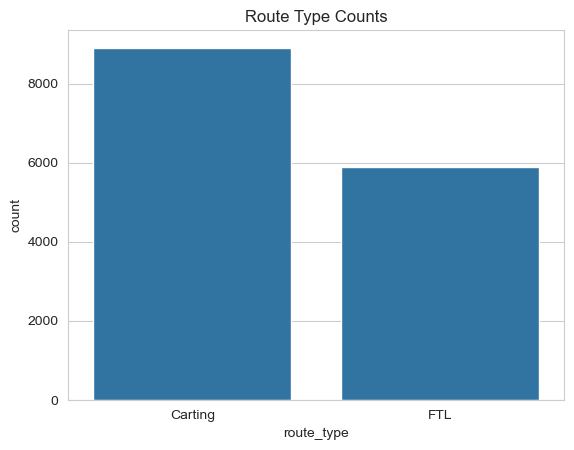

In [21]:
sns.countplot(data=trip_df, x="route_type");
plt.title("Route Type Counts");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- We can see that Carting is the most popular route type

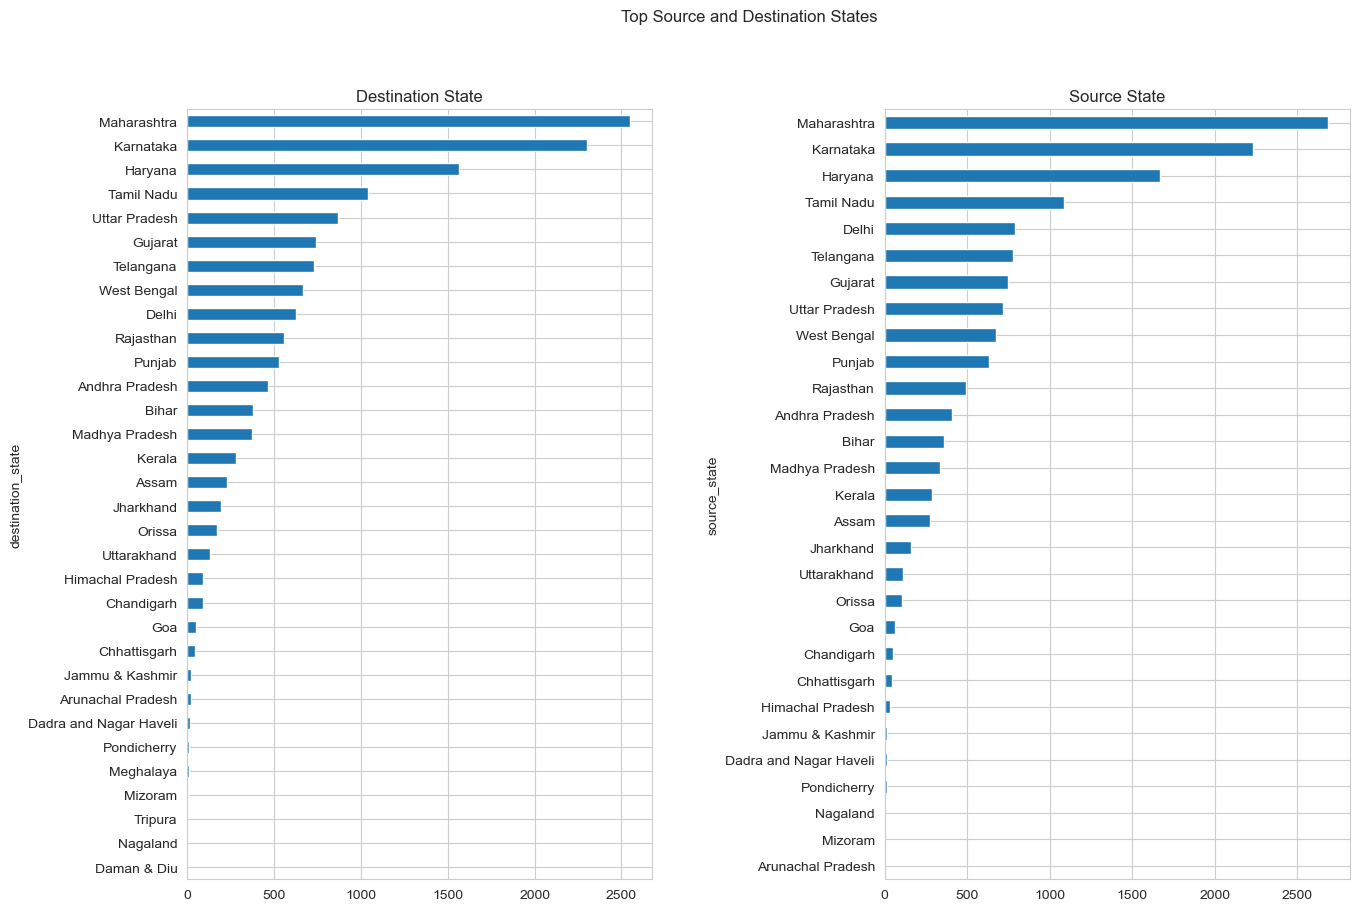

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

trip_df["destination_state"].value_counts().sort_values().plot(kind="barh", ax=ax[0])
trip_df["source_state"].value_counts().sort_values().plot(kind="barh", ax=ax[1])
plt.subplots_adjust(wspace=0.5)
# plt.subplots_adjust(top=-1.85)
ax[0].set_title("Destination State")
ax[1].set_title("Source State")
plt.suptitle("Top Source and Destination States");


<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of the trips are from Maharashtra

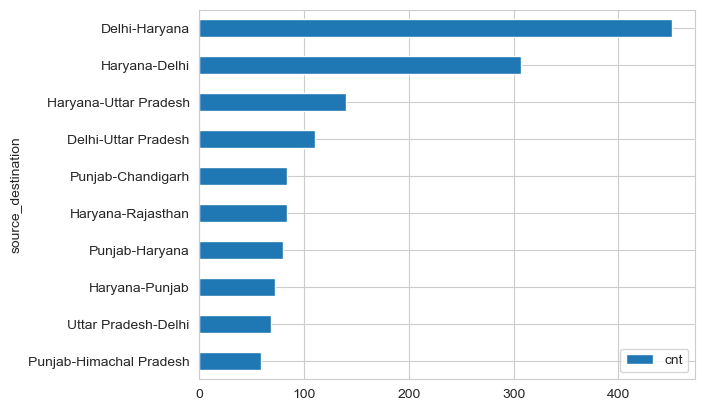

In [23]:
db.sql(""" 
select 
    concat(source_state,'-',destination_state) as source_destination
    , count(*) cnt 
    from trip_df 
       where source_state != destination_state 
       group by source_state, destination_state 
       order by cnt desc
""").to_df().head(10).sort_values(by="cnt").plot(kind="barh", x="source_destination", y="cnt");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that most of trips have been made between Delhi and Haryana

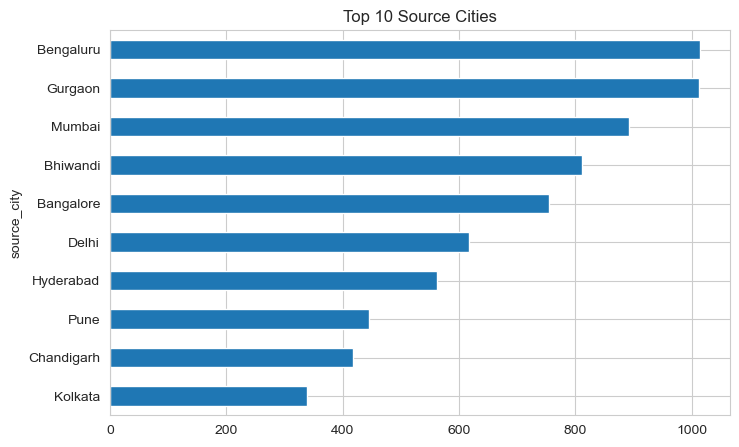

In [24]:
trip_df["source_city"].value_counts().sort_values()[-10:].plot(kind="barh", figsize=(8,5));
plt.title("Top 10 Source Cities");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- Bengaluru is the most popular source city

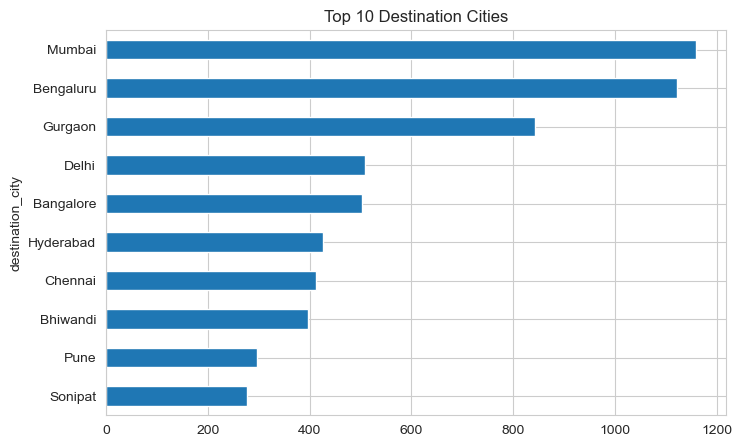

In [25]:
trip_df["destination_city"].value_counts().sort_values()[-10:].plot(kind="barh", figsize=(8,5));
plt.title("Top 10 Destination Cities");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- Mumbai is the most popular destination city

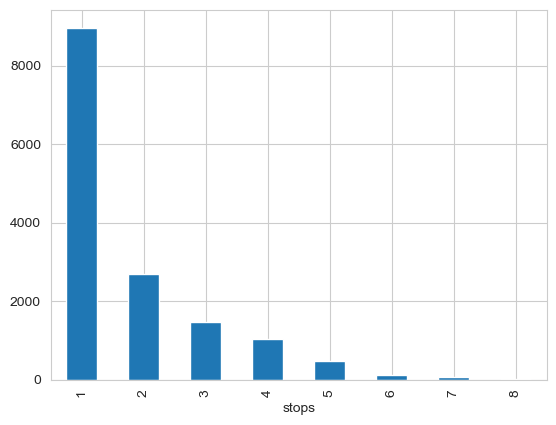

In [26]:
trip_df["stops"].value_counts().plot(kind="bar");

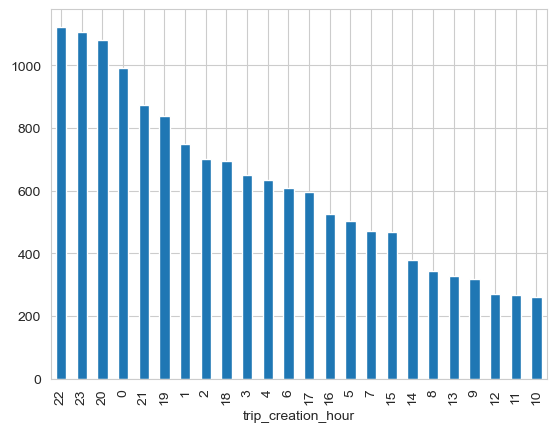

In [57]:
trip_df["trip_creation_hour"].value_counts().plot(kind="bar");

- From above plot we can see that most of the trips at night time

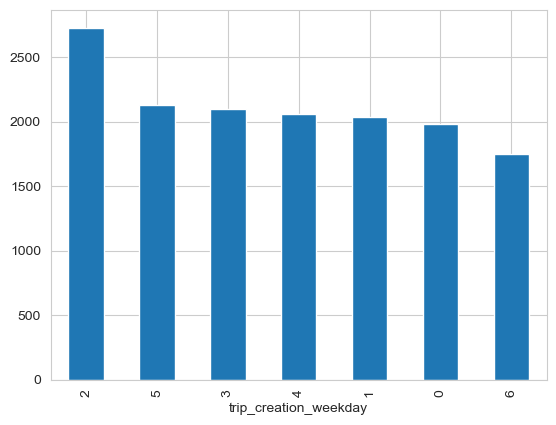

In [58]:
trip_df["trip_creation_weekday"].value_counts().plot(kind="bar");

- From above plot we can see that most of the trips are made on Tuesdays

In [27]:
route_based_cnt=db.sql(""" 
select 
    concat(source_state,'-',destination_state) as source_destination
    , route_type
    , count(*) cnt 
    from trip_df 
       where source_state != destination_state 
       group by source_state, destination_state , route_type 
       order by cnt desc
""").to_df().pivot(index="source_destination", columns="route_type", values="cnt")
route_based_cnt=route_based_cnt.reset_index()
route_based_cnt

route_type,source_destination,Carting,FTL
0,Andhra Pradesh-Karnataka,2.0,14.0
1,Andhra Pradesh-Orissa,4.0,2.0
2,Andhra Pradesh-Telangana,NaN,16.0
3,Arunachal Pradesh-Assam,4.0,NaN
4,Assam-Arunachal Pradesh,23.0,1.0
...,...,...,...
107,West Bengal-Assam,NaN,8.0
108,West Bengal-Bihar,NaN,1.0
109,West Bengal-Haryana,NaN,11.0
110,West Bengal-Jharkhand,NaN,20.0


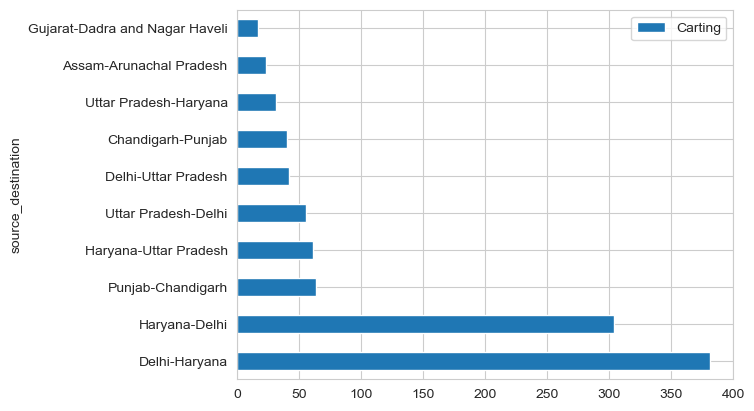

In [28]:
route_based_cnt[["source_destination", "Carting"]].sort_values(by="Carting", ascending=False).head(10).plot(kind="barh", x="source_destination", y="Carting");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

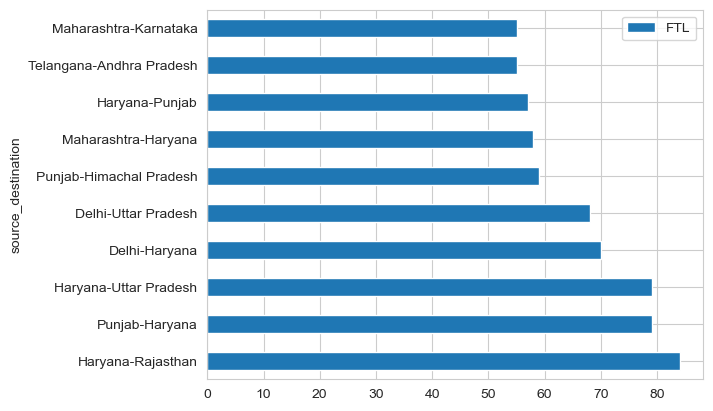

In [29]:
route_based_cnt[["source_destination", "FTL"]].sort_values(by="FTL", ascending=False  ).head(10).plot(kind="barh", x="source_destination", y="FTL");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>


In [30]:
trip_df.head()

,trip_uuid,source_center,destination_center,stops,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city,trip_creation_hour,trip_creation_day,trip_creation_month,trip_creation_weekday,od_start_time_month,od_end_time_month,od_end_time_day,od_start_time_day,od_start_time_hour,od_end_time_hour,od_start_time_minute,od_end_time_minute,od_diff_hours
0,153671066826362165,IND560043AAC,IND560043AAC,2,Carting,146.0,22.424210,64.0,34.0,28.9203,Karnataka,HBR,Karnataka,Bengaluru,0,12,9,2,9,9,12,12,0,3,4,0,2.940805
1,153671320412492075,IND562132AAA,IND501359AAE,2,FTL,916.0,472.046507,739.0,471.0,596.8154,Karnataka,Bangalore,Andhra Pradesh,Kurnool,0,12,9,2,9,9,12,12,0,16,55,12,15.282353
2,153671547254076660,IND501359AAE,IND501359AAE,7,FTL,1792.0,543.049566,988.0,620.0,766.4318,Telangana,Hyderabad,Telangana,Choutuppal,1,12,9,2,9,9,13,12,1,7,24,19,29.921330
3,153671706877291618,IND462001AAA,IND462022AAA,1,Carting,62.0,13.304020,42.0,12.0,14.1766,Madhya Pradesh,Bhopal,Madhya Pradesh,Bhopal,1,12,9,2,9,9,12,12,3,4,33,35,1.035905
4,153671899904329250,IND110037AAM,IND125005AAA,3,FTL,734.0,185.633835,363.0,198.0,218.2951,Delhi,Delhi,Haryana,Gurgaon,2,12,9,2,9,9,12,12,2,14,23,38,12.251381


In [31]:
columns=['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time_to_destination', 'segment_osrm_time',
       'segment_osrm_distance', 'od_diff_hours']

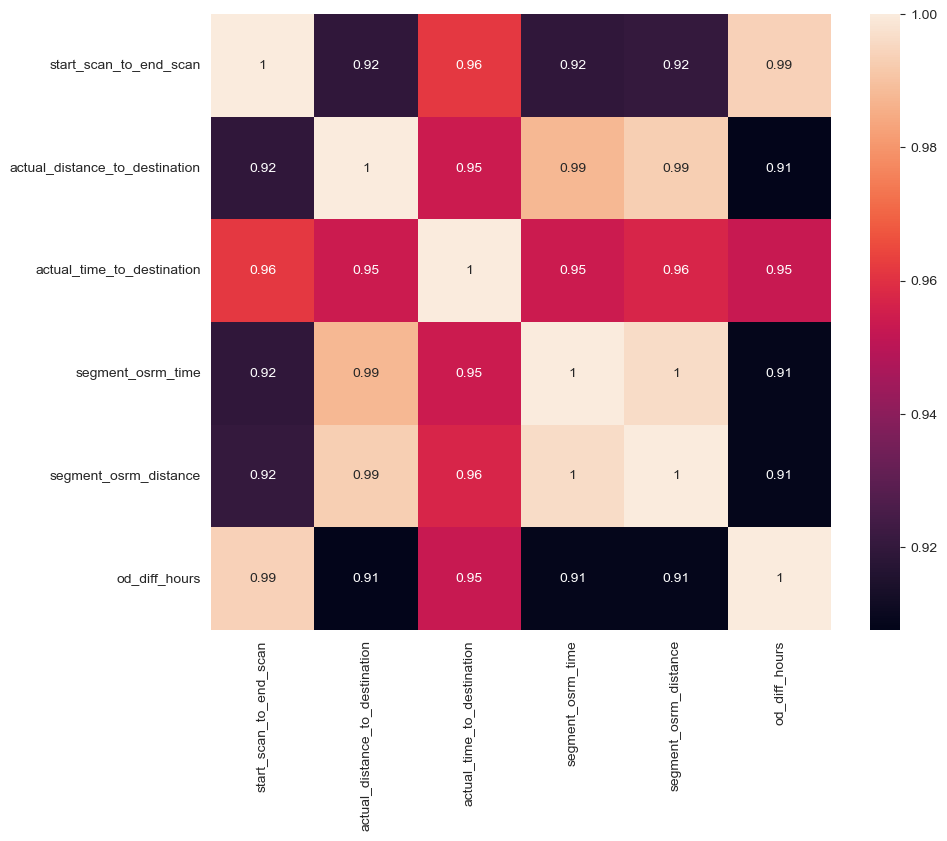

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(trip_df[columns].corr(), annot=True);

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see the correlation between different features.
- We can use this plot to remove highly correlated features from the dataset

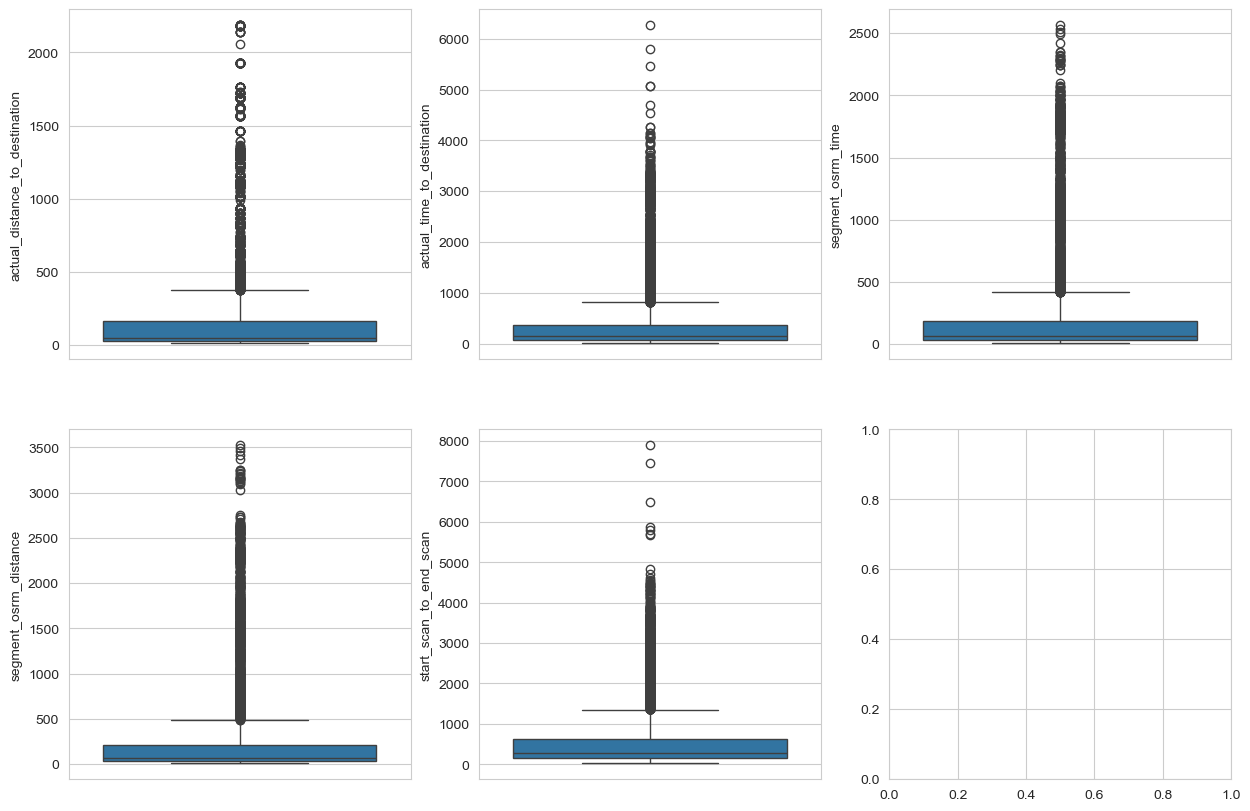

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=trip_df, y="actual_distance_to_destination", ax=ax[0, 0])
sns.boxplot(data=trip_df, y="actual_time_to_destination", ax=ax[0, 1])
sns.boxplot(data=trip_df, y="segment_osrm_time", ax=ax[0, 2])
sns.boxplot(data=trip_df, y="segment_osrm_distance", ax=ax[1, 0])
sns.boxplot(data=trip_df, y="start_scan_to_end_scan", ax=ax[1, 1]);

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- Lot of outliers as per box plot. 

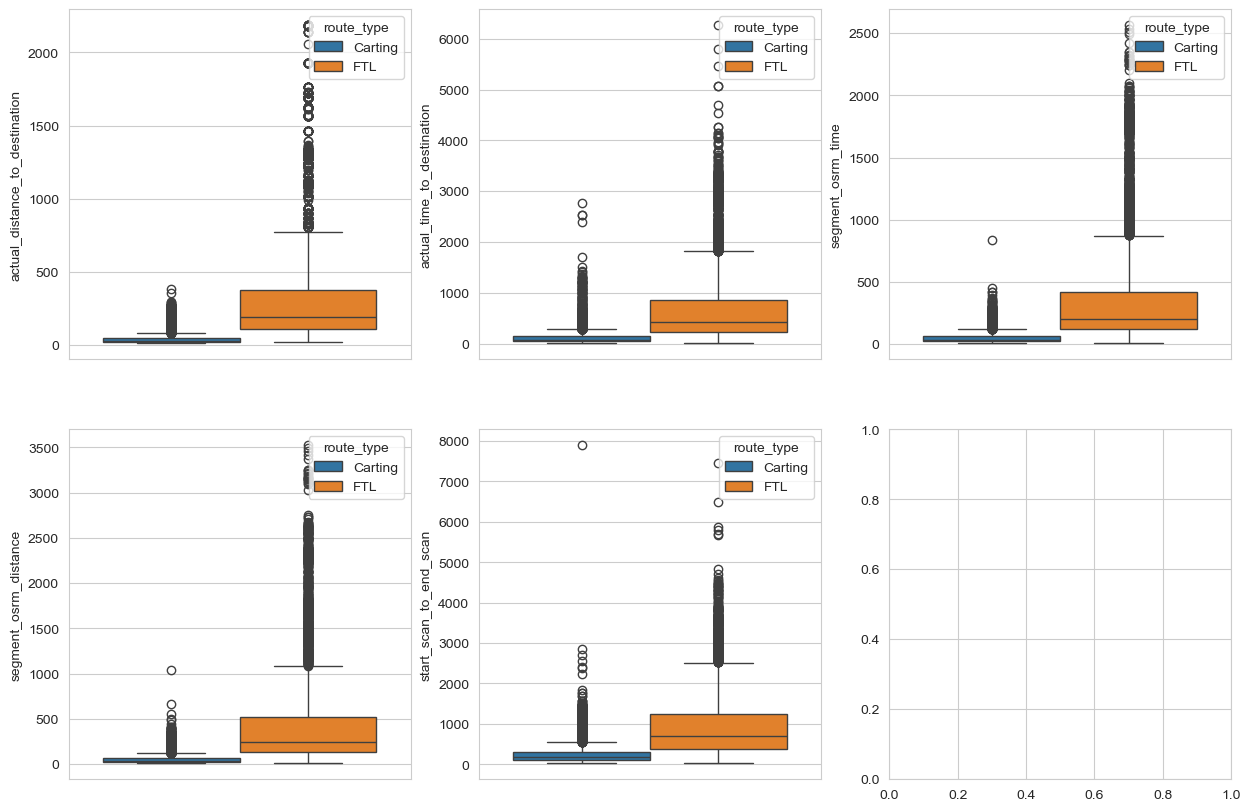

In [34]:
fig, ax= plt.subplots(2,3,figsize=(15,10))
sns.boxplot(data=trip_df, y="actual_distance_to_destination", ax=ax[0,0],  hue="route_type");
sns.boxplot(data=trip_df, y="actual_time_to_destination", ax=ax[0,1], hue="route_type");
sns.boxplot(data=trip_df, y="segment_osrm_time", ax=ax[0,2], hue="route_type");
sns.boxplot(data=trip_df, y="segment_osrm_distance", ax=ax[1,0], hue="route_type");
sns.boxplot(data=trip_df, y="start_scan_to_end_scan", ax=ax[1,1], hue="route_type");

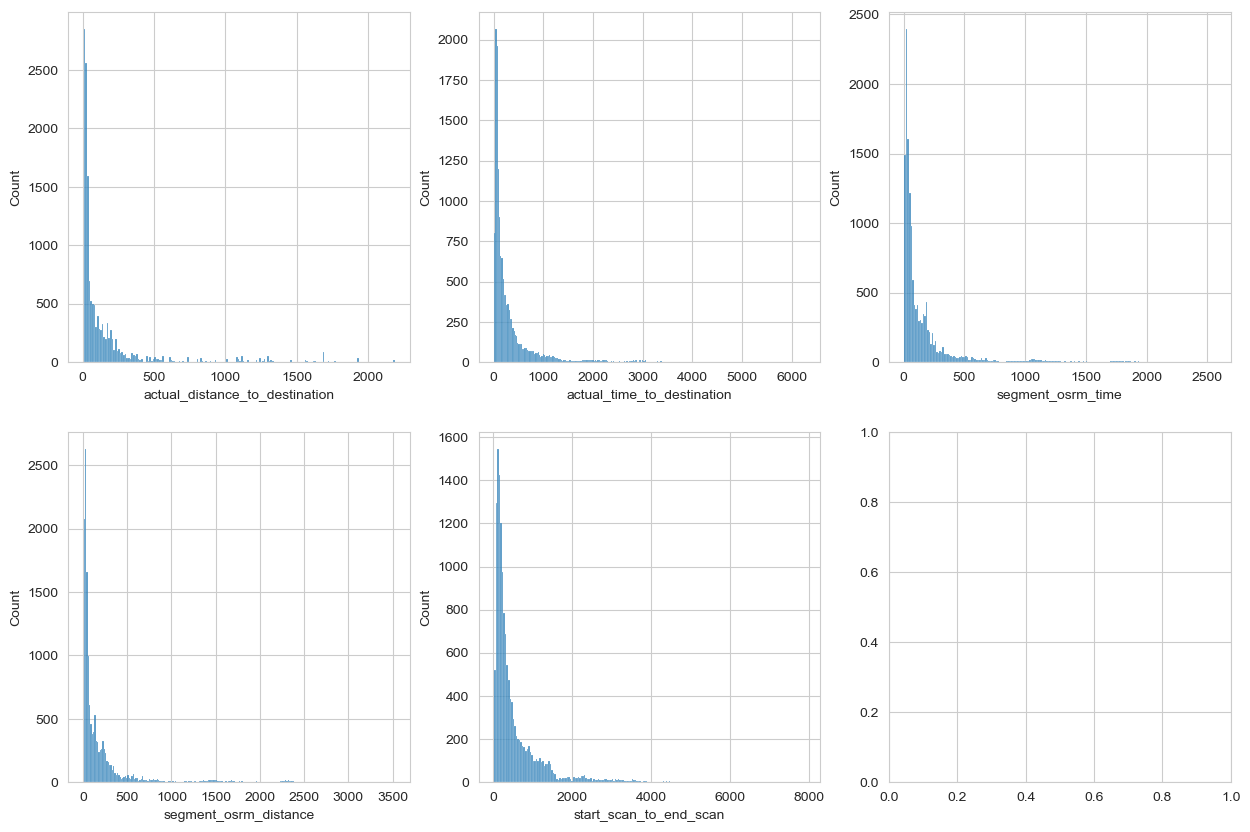

In [35]:
fig, ax= plt.subplots(2,3,figsize=(15,10))
sns.histplot(data=trip_df, x="actual_distance_to_destination", ax=ax[0,0]);
sns.histplot(data=trip_df, x="actual_time_to_destination", ax=ax[0,1]);
sns.histplot(data=trip_df, x="segment_osrm_time", ax=ax[0,2]);
sns.histplot(data=trip_df, x="segment_osrm_distance", ax=ax[1,0]);
sns.histplot(data=trip_df, x="start_scan_to_end_scan", ax=ax[1,1]);

Applying Log transformation 

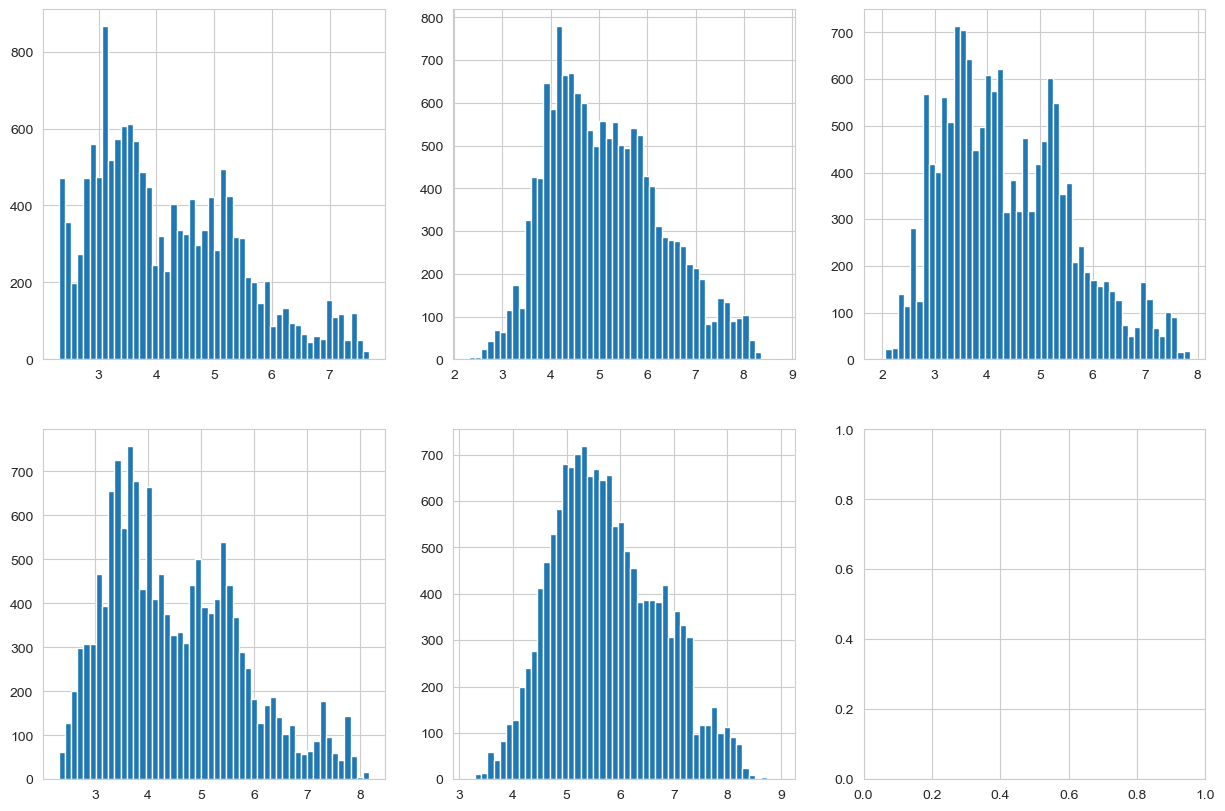

In [36]:
fig, ax= plt.subplots(2,3,figsize=(15,10))

np.log1p(trip_df["actual_distance_to_destination"]).hist(bins=50, ax=ax[0,0]);
np.log1p(trip_df["actual_time_to_destination"]).hist(bins=50, ax=ax[0,1]);
np.log1p(trip_df["segment_osrm_time"]).hist(bins=50, ax=ax[0,2]);
np.log1p(trip_df["segment_osrm_distance"]).hist(bins=50, ax=ax[1,0]);
np.log1p(trip_df["start_scan_to_end_scan"]).hist(bins=50, ax=ax[1,1]);

# Data Preprocessing 

In [37]:
processed_df=trip_df.copy()

**Applying log transformation to convert non normal data to normal distribution**

In [38]:
processed_df["actual_distance_to_destination"] = np.log1p(processed_df["actual_distance_to_destination"])
processed_df["actual_time_to_destination"]=np.log1p(processed_df["actual_time_to_destination"])
processed_df["segment_osrm_time"] = np.log1p(processed_df["segment_osrm_time"])
processed_df["segment_osrm_distance"] = np.log1p(processed_df["segment_osrm_distance"])
processed_df["start_scan_to_end_scan"] = np.log1p(processed_df["start_scan_to_end_scan"])

H0 = "The actual_distance_to_destination is less than or equal to segment_osrm_distance"  
H1 = "The segment_osrm_distance is greater than actual_distance_to_destination"

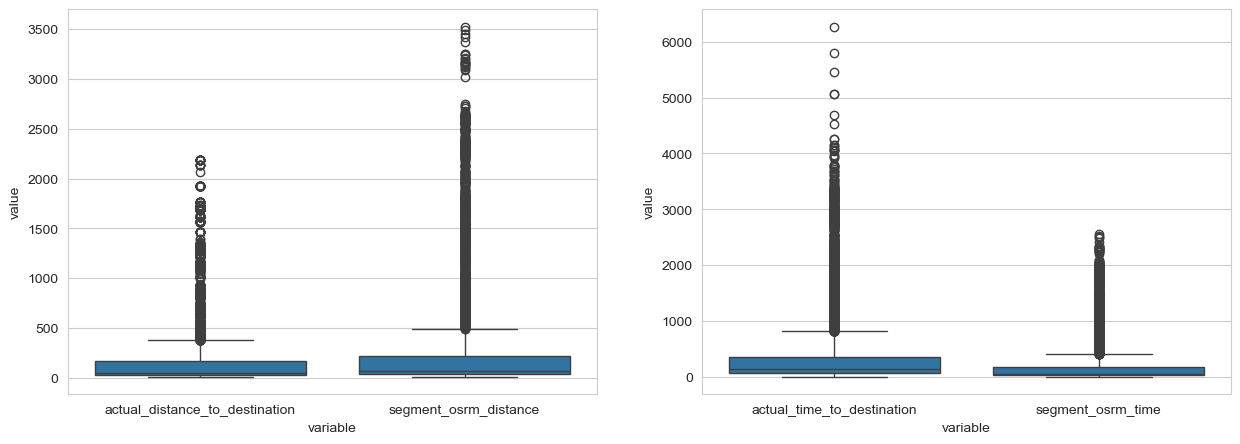

In [39]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=pd.melt(trip_df[["actual_distance_to_destination", "segment_osrm_distance"]]), x="variable", y="value", ax=ax[0]);
sns.boxplot(data=pd.melt(trip_df[["actual_time_to_destination", "segment_osrm_time"]]), x="variable", y="value", ax=ax[1]);

In [40]:
# mannwhitneyu(trip_df["actual_distance_to_destination"], trip_df["segment_osrm_distance"], alternative="greater")
ttest_ind(trip_df["segment_osrm_distance"], trip_df["actual_distance_to_destination"] , alternative="greater")

TtestResult(statistic=13.791758457154524, pvalue=1.94336645790463e-43, df=29572.0)

Since p-value is less than 0.05, we reject the null hypothesis. ie the segment_osrm_distance is greater than actual_distance_to_destination.

H0 = "The actual_time_to_destination is less than or equal to segment_osrm_time"  
H1 = "The actual_time_to_destination is greater than segment_osrm_time"

In [41]:
ttest_ind(trip_df["actual_time_to_destination"], trip_df["segment_osrm_time"] , alternative="greater")

TtestResult(statistic=33.21041532061086, pvalue=8.847334685136661e-238, df=29572.0)

Since p-value is less than 0.05, we reject the null hypothesis. ie the actual_time_to_destination is greater than segment_osrm_time.

## Categorical Feature Encoding

In [42]:
processed_df["route_type"] = processed_df["route_type"].apply(lambda x: 1 if x=="FTL" else 0)

In [43]:
label_encoder_source_destination=LabelEncoder()
unique_source_destination_list=list(set([*processed_df["source_center"].unique() , *processed_df["destination_center"].unique()]))
label_encoder_source_destination.fit(unique_source_destination_list)
processed_df["source_center"]=label_encoder_source_destination.transform(processed_df["source_center"])
processed_df["destination_center"]=label_encoder_source_destination.transform(processed_df["destination_center"])
# unique_source_destination_list

In [44]:
labe_encoder_state=LabelEncoder()
unique_state_list=list(set([*processed_df["source_state"].unique() , *processed_df["destination_state"].unique()]))
labe_encoder_state.fit(unique_state_list)
processed_df["source_state"]=labe_encoder_state.transform(processed_df["source_state"])
processed_df["destination_state"]=labe_encoder_state.transform(processed_df["destination_state"])

In [45]:
labe_encoder_city=LabelEncoder()
unique_city_list=list(set([*processed_df["source_city"].unique() , *processed_df["destination_city"].unique()]))
labe_encoder_city.fit(unique_city_list)
processed_df["source_city"]=labe_encoder_city.transform(processed_df["source_city"])
processed_df["destination_city"]=labe_encoder_city.transform(processed_df["destination_city"])

In [46]:
with open("processed_df.pkl", "wb") as f:
    pickle.dump(processed_df, f)

## Numerical Feature Scaling

In [49]:
standard_scaling_columns=["start_scan_to_end_scan", "actual_distance_to_destination", "actual_time_to_destination", "segment_osrm_time", "segment_osrm_distance", "od_diff_hours"]

In [50]:
sc=StandardScaler()
processed_df[standard_scaling_columns]=sc.fit_transform(processed_df[standard_scaling_columns])

In [51]:
min_max_scaling_columns=["trip_creation_hour", "trip_creation_day", "trip_creation_month", "trip_creation_weekday", "od_start_time_month", "od_end_time_month", "od_end_time_day", "od_start_time_day", "od_start_time_hour", "od_end_time_hour", "od_start_time_minute", "od_end_time_minute"]

In [52]:
min_max_sc=MinMaxScaler()
processed_df[min_max_scaling_columns]=min_max_sc.fit_transform(processed_df[min_max_scaling_columns])

In [53]:
processed_df.sample(5)

,trip_uuid,source_center,destination_center,stops,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time_to_destination,segment_osrm_time,segment_osrm_distance,source_state,source_city,destination_state,destination_city,trip_creation_hour,trip_creation_day,trip_creation_month,trip_creation_weekday,od_start_time_month,od_end_time_month,od_end_time_day,od_start_time_day,od_start_time_hour,od_end_time_hour,od_start_time_minute,od_end_time_minute,od_diff_hours
13030,153711376546949422,631,652,1,1,0.758439,0.912703,0.792872,0.682123,0.790006,17,1005,17,903,0.695652,0.517241,0.0,1.000000,0.0,0.0,0.551724,0.551724,0.217391,0.695652,0.322034,0.457627,0.181704
9936,153841611624795545,48,7,1,0,-0.688064,-0.275741,-0.563173,-0.218074,-0.281403,11,318,11,373,0.739130,0.000000,1.0,0.000000,1.0,1.0,0.000000,0.000000,0.739130,0.869565,0.813559,0.440678,-0.581222
711,153818327834012967,7,1146,1,1,2.069267,2.357963,2.223589,2.278721,2.360979,11,373,22,160,0.043478,0.965517,0.0,0.833333,0.0,0.0,1.000000,0.965517,0.043478,0.782609,0.118644,0.237288,2.873350
6085,153792060923425459,684,674,2,0,-0.157910,-0.783123,-0.004565,-0.882586,-0.705198,27,412,27,644,0.000000,0.862069,0.0,0.333333,0.0,0.0,0.862069,0.862069,0.043478,0.217391,0.067797,0.542373,-0.415582
12616,153817019774684076,1000,1000,3,0,0.428922,0.545750,0.139606,0.450775,0.448803,26,247,26,902,0.913043,0.931034,0.0,0.666667,0.0,0.0,0.965517,0.931034,0.913043,0.260870,0.491525,0.355932,-0.021915


# Recommendations

- Delhi Haryana seems to be the busiest trip
- Since it is the busiest trip, the route type should be FTL instead of Carting